In [19]:
import math
import numpy as np 
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

## Simulate mean-reversion model

This random process may be known as [Ornstein–Uhlenbeck process](https://en.m.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process)

Stochastic equation: $dX(t) = a( \overline{X} - X(t))dt + bdw(t)$, $X(0) = X_0$

Solution: $X(t) = X_0 \cdot e^{-at} + \overline{X} (1 - e^{-at}) + b\int_0^t e^{-a(t-s)}dw(s) $

Expected: $EX(t) = X_0 \cdot e^{-at} + \overline{X} (1 - e^{-at})$

Kovariation: $cov(X_t, X_s) = \frac{b^2}{2a} (e^{-a|t-s|} - e^{a(t+s)}) $

$D X(t) = cov(X_t, X_t)= \frac{b^2}{2a} (1 - e^{-2at})$


Let's simulate solution for this stochasctic differential equation 10 times


In [66]:
def mean_reversion_simulation(a, b, x0, x_mean, T, h=1e-6):
    '''
    making one simulation of mean_reversion process
    using Euler–Maruyama method
    a, b - fixes constants
    x0 - starting point at t=0
    x_mean - fixed mean value
    T - total time of simulation
    h - step for simulation    
    '''
    steps = int(T/h)
    mean_reversion = np.zeros(steps + 1)
    mean_reversion[0] = x0
    for i in range(1, steps + 1):
        prev = mean_reversion[i-1]
        mean_reversion[i] = prev + a * (x_mean - prev)* h + b * h ** 0.5 * np.random.normal(size=1)
    return mean_reversion


def mean_reversion_mean(a, b, x0, x_mean, T, h=1e-6):
    '''
    making mean value of mean_reversion process
    a, b - fixes constants
    x0 - starting point at t=0
    x_mean - fixed mean value
    T - total time of simulation
    h - step for simulation    
    '''
    steps = int(T/h)
    mean_reversion = np.zeros(steps + 1)
    mean_reversion[0] = x0
    for i in range(1, steps + 1):
        tau = i*h
        mean_reversion[i] = x0 * np.exp(- a * tau) + x_mean * (1 - np.exp(- a * tau))
    return mean_reversion


def mean_reversion_std(a, b, x0, x_mean, T, h=1e-6):
    '''
    making std value of mean_reversion process
    a, b - fixes constants
    x0 - starting point at t=0
    x_mean - fixed mean value
    T - total time of simulation
    h - step for simulation    
    '''
    steps = int(T/h)
    mean_reversion = np.zeros(steps + 1)
    mean_reversion[0] = 0
    for i in range(1, steps + 1):
        tau = i*h
        mean_reversion[i] = b * b * (1 - np.exp(-2 * a * tau)) / (2 * a)
    return mean_reversion

  0%|          | 0/10 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Mean-reversion process with a=1, b=2, X0=1, X_mean=10')

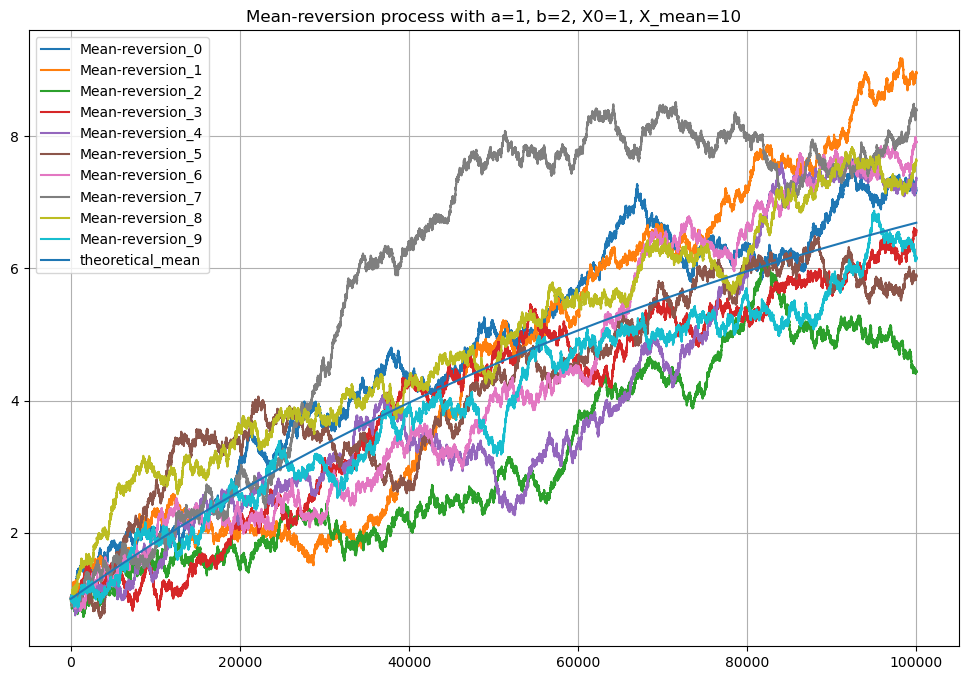

In [37]:
df = pd.DataFrame()
args = {'a': 1, 'b': 2, 'x0': 1, 'x_mean': 10, 'T':1, 'h':1e-6}

for i in tqdm(range(10)):
    df['Mean-reversion_' + str(i)] = mean_reversion_simulation(**args)

df['theoretical_mean'] = mean_reversion_mean(**args)
df.plot(grid= True, figsize= (12, 8))
plt.title(f"Mean-reversion process with a={args['a']}, b={args['b']}, X0={args['x0']}, X_mean={args['x_mean']}")

Let's see other process with new constants

  0%|          | 0/10 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Mean-reversion process with a=0.001, b=0.002, X0=1, X_mean=0')

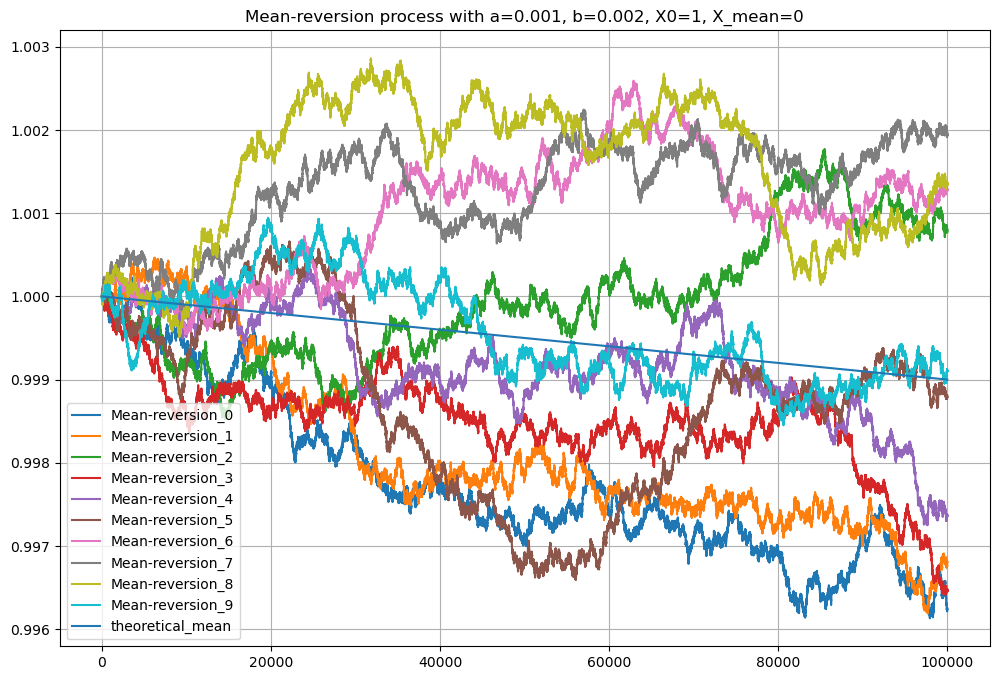

In [38]:
df = pd.DataFrame()
args = {'a': 0.001, 'b': 0.002, 'x0': 1, 'x_mean': 0, 'T':1, 'h':1e-5}

for i in tqdm(range(10)):
    df['Mean-reversion_' + str(i)] = mean_reversion_simulation(**args)

df['theoretical_mean'] = mean_reversion_mean(**args)
df.plot(grid= True, figsize= (12, 8))
plt.title(f"Mean-reversion process with a={args['a']}, b={args['b']}, X0={args['x0']}, X_mean={args['x_mean']}")

## Simulate mean-reversion model to get mean and std values of process

Let's simaulate mean-reversion process 10000 times and get estimation for mean and std value of original process

In [62]:
df = pd.DataFrame()
args = {'a': 1, 'b': 2, 'x0': 1, 'x_mean': 10, 'T':1, 'h':1e-4}
N = 10000

for i in tqdm(range(N)):
    df = pd.concat([df, pd.Series(mean_reversion_simulation(**args), name='Mean-reversion_' + str(i))], axis=1)

  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 

Text(0.5, 1.0, 'Mean-reversion process and estimation with a=1, b=2, X0=1, X_mean=10')

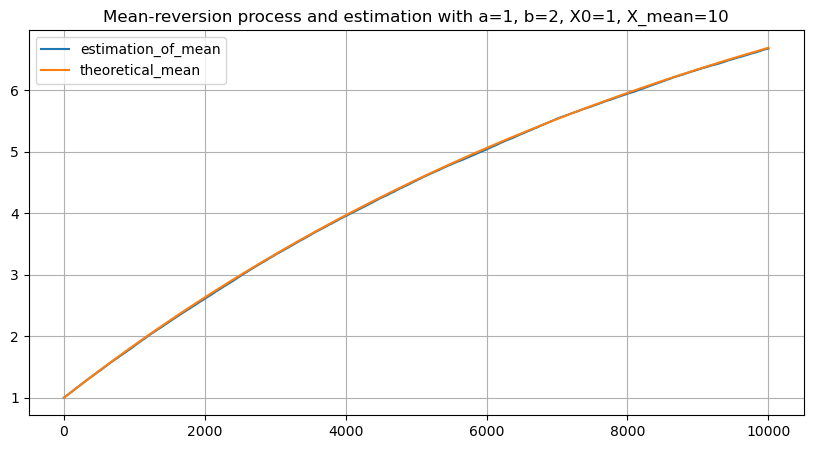

In [63]:
df['estimation_of_mean'] = df.mean(axis=1)
df['theoretical_mean'] = mean_reversion_mean(**args)

df[['estimation_of_mean', 'theoretical_mean']].plot(grid= True, figsize= (10, 5))
plt.title(f"Mean-reversion process and estimation with a={args['a']}, b={args['b']}, X0={args['x0']}, X_mean={args['x_mean']}")

Text(0.5, 1.0, 'Mean-reversion process and estimation with a=1, b=2, X0=1, X_mean=10')

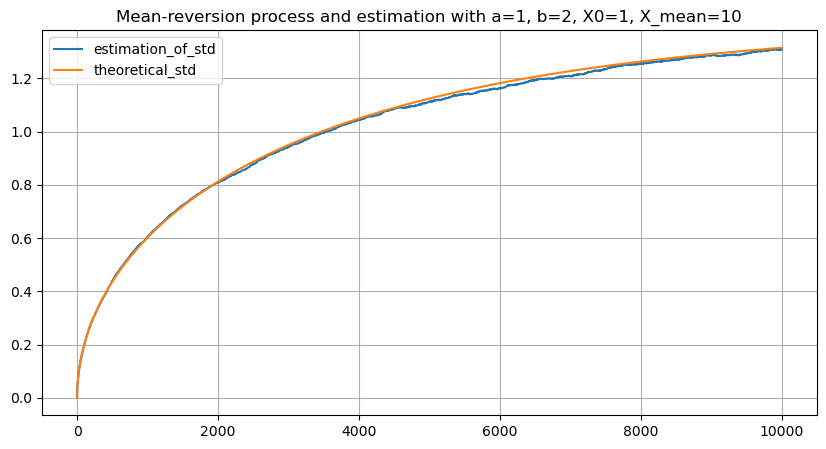

In [68]:
df_std = pd.DataFrame()
df_std['estimation_of_std'] = df.std(axis = 1)
df_std['theoretical_std'] = mean_reversion_std(**args) ** 0.5

df_std.plot(grid= True, figsize= (10, 5))
plt.title(f"Mean-reversion process and estimation with a={args['a']}, b={args['b']}, X0={args['x0']}, X_mean={args['x_mean']}")

Only after 6000 iterations we get wonderful estimation for mean value and some worther esimation for std